In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# file, indicator = "CrossingSmaIndicator/1641168000000-1644364800000-4h-history.csv", "SMA10"
file, indicator = "MAIndicator/1641168000000-1644364800000-4h-history.csv", "normalized_EMA10"
df = pd.read_csv("../data/trading_history/" + file, low_memory=False)

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EntryTime', 'EntryPrice',
       'Position', 'ExitPrice', 'ExitTime', 'MaxDrawDown', 'Variation',
       'Portfolio', 'EMA10', 'normalized_EMA10', 'dnormalized_EMA10',
       'ddnormalized_EMA10'],
      dtype='object')

In [14]:
short_position_winning = df[(df.Variation > 0) & (df.Position == "SHORT")]
short_position_losing = df[(df.Variation <= 0) & (df.Position == "SHORT")]
long_position_winning = df[(df.Variation > 0) & (df.Position == "LONG")]
long_position_losing = df[(df.Variation <= 0) & (df.Position == "LONG")]

### Analysis of indicator according to position 

In [15]:
def plot_success_analasys(col):
    fig, axs = plt.subplots(2,1, figsize=(15, 15))
    axs[0].title.set_text('Short position')
    axs[1].title.set_text('Long position')


    short_position_winning[col].plot(kind='kde', ax=axs[0], color="green")
    axs[0].text(x=0.01,
                y=0.99,
                s=f"Winning: \nmean: {short_position_winning[col].mean()}\nstd: {short_position_winning[col].std()}",
                color="green",
                ha='left', 
                va='top', 
                transform=axs[0].transAxes,
               )


    short_position_losing[col].plot(kind='kde', ax=axs[0], color="red")
    axs[0].text(x=0.99,
                y=0.99,
                s=f"Losing : \nmean: {short_position_losing[col].mean()}\nstd: {short_position_winning[col].std()}",
                color="red",
                ha='right', 
                va='top', 
                transform=axs[0].transAxes,
                )


    long_position_winning[col].plot(kind='kde', ax=axs[1], color="green")
    axs[1].text(x=0.01,
                y=0.99, 
                s=f"Winning : \nmean: {long_position_winning[col].mean()}\nstd: {long_position_winning[col].std()}",
                color="green",
                ha='left', 
                va='top', 
                transform=axs[1].transAxes,
                )


    long_position_losing[col].plot(kind='kde', ax=axs[1], color="red")
    axs[1].text(x=0.99,
                y=0.99, 
                s=f"Losing : \nmean: {long_position_losing[col].mean()}\nstd: {long_position_losing[col].std()}",
                color="red",
                ha='right', 
                va='top', 
                transform=axs[1].transAxes,
               )


#### Analysis of indicator according to position 

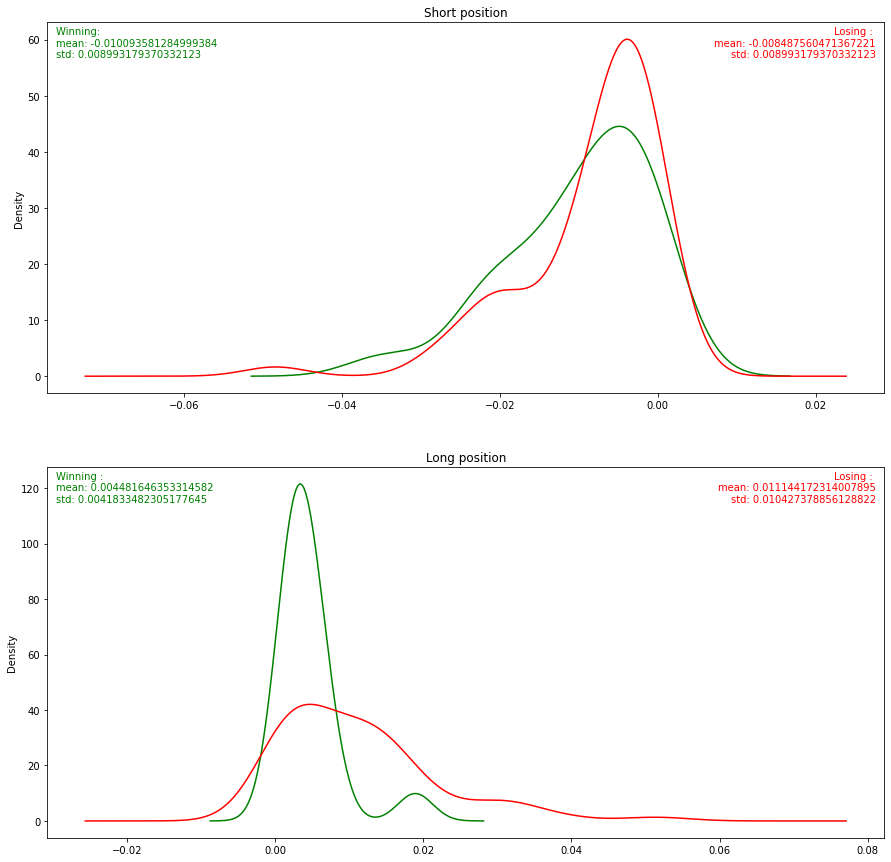

In [16]:
plot_success_analasys(indicator)

## Analysis of derivative of indicator according to position 

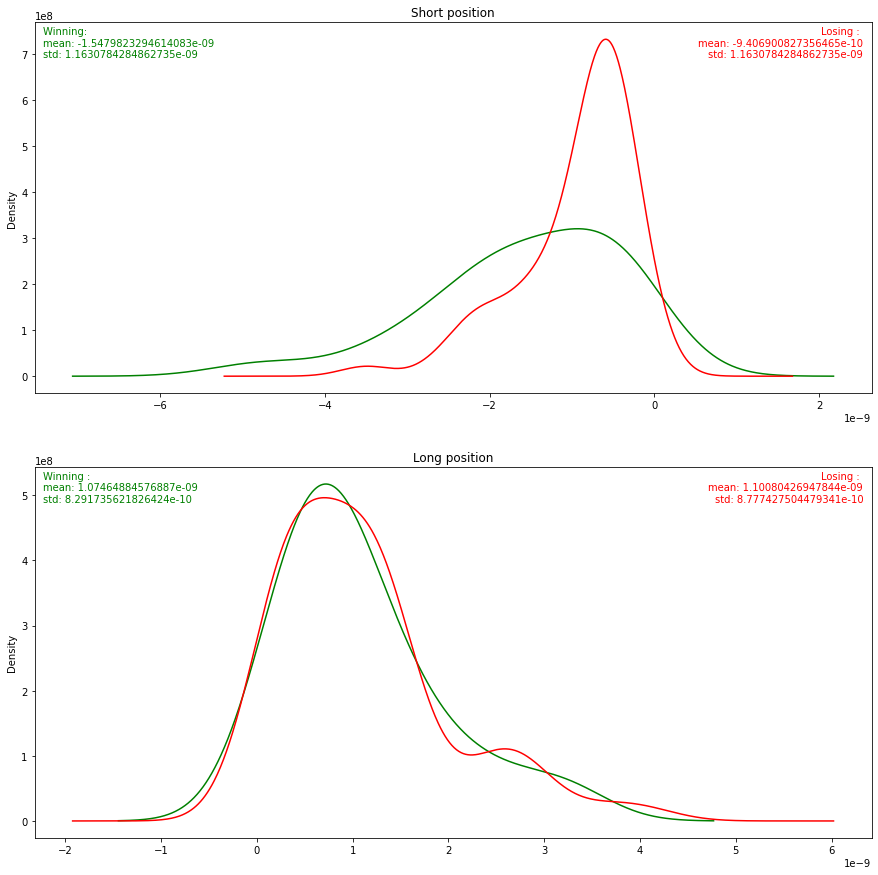

In [17]:
plot_success_analasys("d"+indicator)

## Analysis of derivative second of indicator according to position 

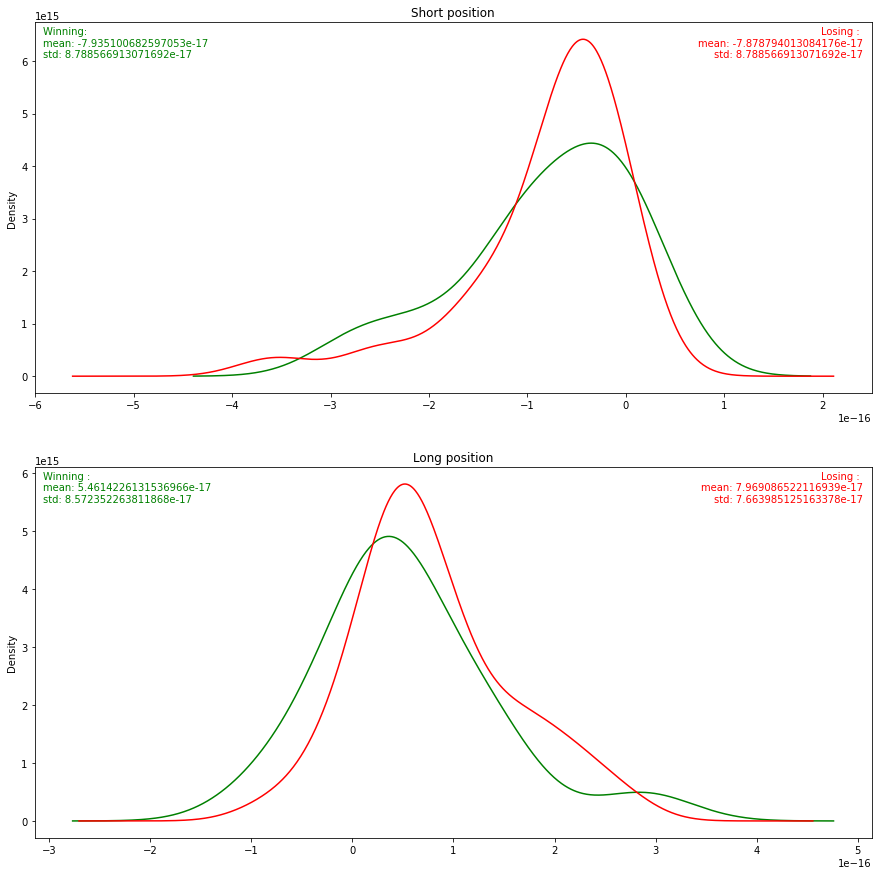

In [18]:
plot_success_analasys("dd"+indicator)